In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
purity_errors = pd.read_csv('errors/purity_errors.csv')
print("Purity Errors: ")
print(purity_errors)


Purity Errors: 
     Sample  Purity-FGA  Staging-Purity-FGA  Subtyping-Purity-FGA  \
0         0       0.208               0.083                 0.049   
1         1       0.388               0.262                 0.086   
2         2       0.010               0.012                 0.017   
3         3       0.008               0.099                 0.062   
4         4       0.104               0.138                 0.181   
..      ...         ...                 ...                   ...   
393     393       0.029               0.042                 0.019   
394     394       0.008               0.101                 0.073   
395     395       0.189               0.111                 0.142   
396     396       0.113               0.049                 0.128   
397     397       0.009               0.157                 0.023   

     Subtyping-Staging-Purity-FGA  
0                           0.167  
1                           0.223  
2                           0.101  
3          

In [13]:
fga_errors = pd.read_csv('errors/fga_errors.csv')
print("FGA Errors: ")
print(fga_errors)

FGA Errors: 
     Sample  Purity-FGA  Staging-Purity-FGA  Subtyping-Purity-FGA  \
0         0       0.028               0.110                 0.193   
1         1       0.086               0.029                 0.228   
2         2       0.109               0.121                 0.288   
3         3       0.065               0.105                 0.280   
4         4       0.013               0.114                 0.346   
..      ...         ...                 ...                   ...   
306     306       0.020               0.023                 0.179   
307     307       0.255               0.235                 0.217   
308     308       0.087               0.006                 0.108   
309     309       0.120               0.161                 0.130   
310     310       0.179               0.126                 0.106   

     Subtyping-Staging-Purity-FGA  
0                           0.072  
1                           0.006  
2                           0.257  
3             

### Scatter Plot Separately

In [231]:
def plot_comparison(ax, data, classifier1, classifier2):
    ax.plot([0, 1], [0, 1], linestyle='--', color='red', zorder=1)
    ax.scatter(data[classifier1], data[classifier2], zorder=2, alpha=0.7, s=16)
    ax.set_xlabel(classifier1)
    ax.set_ylabel(classifier2)
    ax.set_xlim((-0.05, 1.05))
    ax.set_xticks(np.arange(0, 1.05, 0.2))
    ax.set_ylim((-0.05, 1.05))
    ax.set_yticks(np.arange(0, 1.05, 0.2))
    ax.set_axisbelow(True)
    ax.set_title("Tumor purity prediction error", fontsize=10)
    ax.grid()

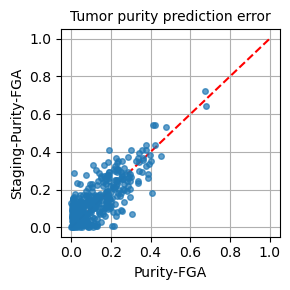

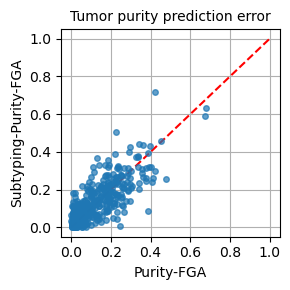

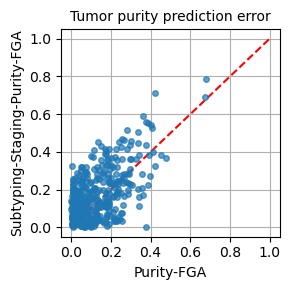

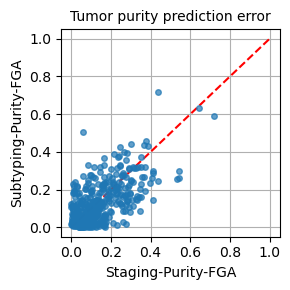

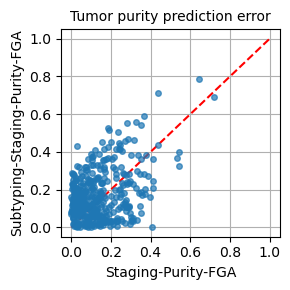

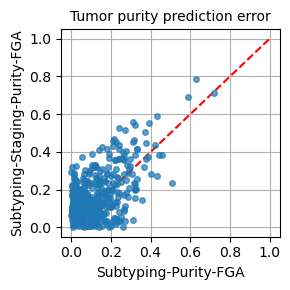

In [232]:
import itertools
classifiers = purity_errors.columns[1:]  
n_classifiers = len(classifiers)

for i, (classifier1, classifier2) in enumerate(itertools.combinations(classifiers, 2)):
    fig, ax = plt.subplots(figsize=(3,3))
    plot_comparison(ax, purity_errors, classifier1, classifier2)

    plt.tight_layout()
    plt.show()


### Grid with Lim 0-1

In [14]:
def plot_comparison(x, y, **kwargs):
    ax = plt.gca()
    ax.plot([0, 1], [0, 1], linestyle='--', color='red', zorder=1)
    ax.scatter(x, y, zorder=2, alpha=0.7, s=16, **kwargs)
    ax.set_xlim((-0.05, 1.05))
    ax.set_xticks(np.arange(0, 1.05, 0.2))
    ax.set_ylim((-0.05, 1.05))
    ax.set_yticks(np.arange(0, 1.05, 0.2))
    ax.grid(True)

def plot_hist(x, **kwargs):
    ax = plt.gca()
    ax.hist(x, edgecolor="w", zorder=0)
    ax.set_xlim((-0.05, 1.05))
    ax.set_xticks(np.arange(0, 1.05, 0.2))
    ax.grid(True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3680\4233408014.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


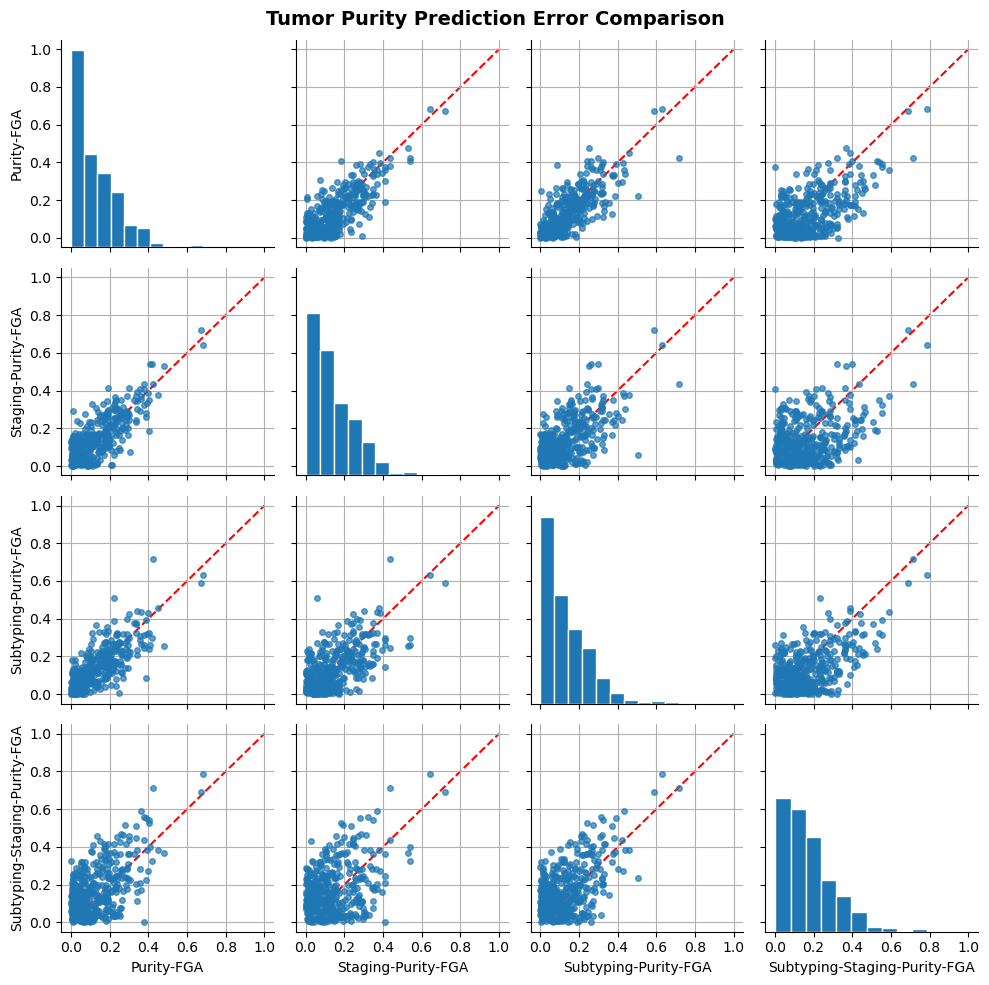

In [15]:
selected_columns = purity_errors.columns[1:]  
grid = sns.PairGrid(purity_errors[selected_columns])

grid.map_diag(plot_hist)
grid.map_offdiag(plot_comparison)

grid.fig.suptitle("Tumor Purity Prediction Error Comparison", fontsize=14, weight='bold')
grid.fig.subplots_adjust(top=0.5)

for i, col in enumerate(selected_columns):
    grid.axes[i][0].set_ylabel(col, fontsize=10)
    grid.axes[-1][i].set_xlabel(col, fontsize=10)

plt.tight_layout()
fig_filename = 'plots/Tumor_purity.png'
grid.savefig(fig_filename, dpi=200)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3680\2888348704.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


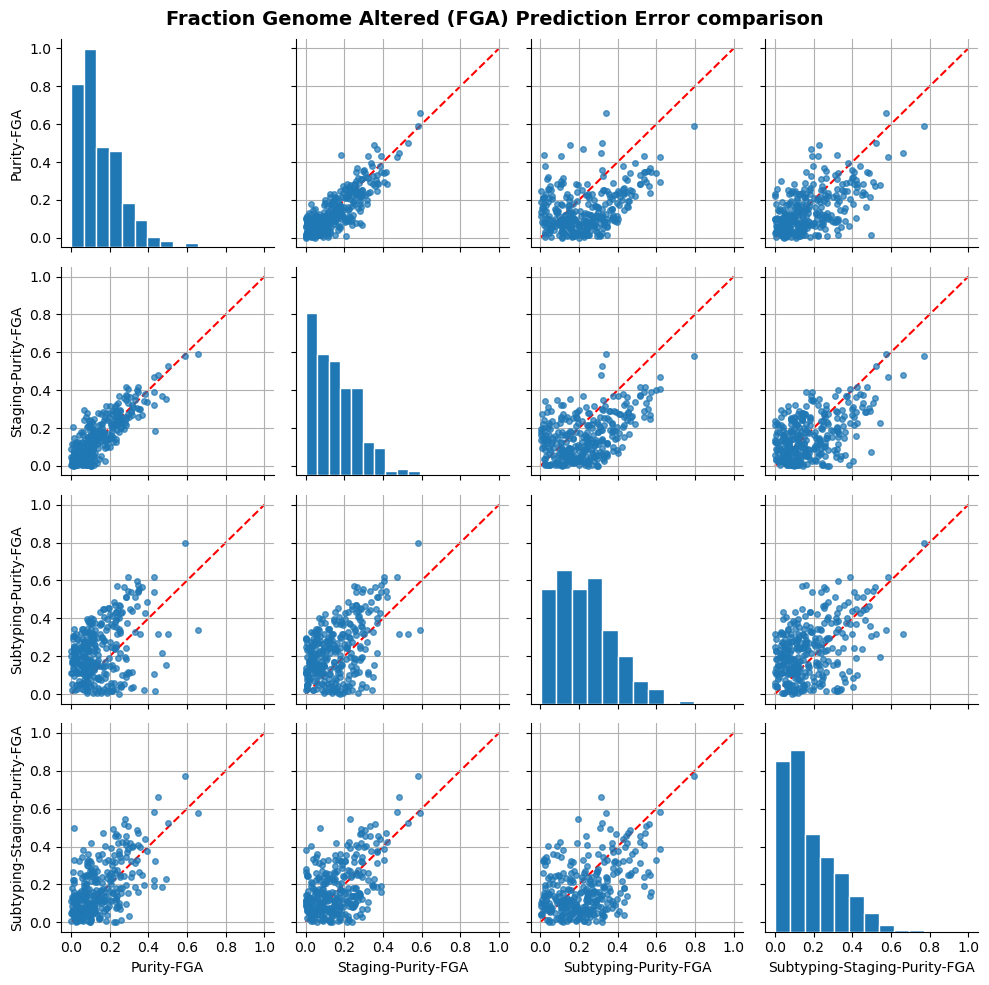

In [16]:
selected_columns = fga_errors.columns[1:]  
grid = sns.PairGrid(fga_errors[selected_columns])

grid.map_diag(plot_hist)
grid.map_offdiag(plot_comparison)

grid.fig.suptitle("Fraction Genome Altered (FGA) Prediction Error comparison", fontsize=14, weight='bold')
grid.fig.subplots_adjust(top=0.95)

for i, col in enumerate(selected_columns):
    grid.axes[i][0].set_ylabel(col, fontsize=10)
    grid.axes[-1][i].set_xlabel(col, fontsize=10)

plt.tight_layout()
fig_filename = 'plots/FGA.png'
grid.savefig(fig_filename, dpi=200)
plt.show()

### Grid with lim 0-0.2

In [236]:
def plot_comparison(x, y, **kwargs):
    ax = plt.gca()
    ax.plot([0, 0.2], [0, 0.2], linestyle='--', color='red', zorder=1)
    ax.scatter(x, y, zorder=2, alpha=0.7, s=16, **kwargs)
    ax.set_xlim((-0.01, 0.25))
    ax.set_xticks(np.arange(0, 0.25, 0.05))
    ax.set_ylim((-0.01, 0.25))
    ax.set_yticks(np.arange(0, 0.25, 0.05))
    ax.grid(True)

def plot_hist(x, **kwargs):
    ax = plt.gca()
    ax.hist(x, edgecolor="w", zorder=0)
    ax.set_xlim((-0.01, 0.25))
    ax.set_xticks(np.arange(0, 0.25, 0.05))
    ax.grid(True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4312\1444679268.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


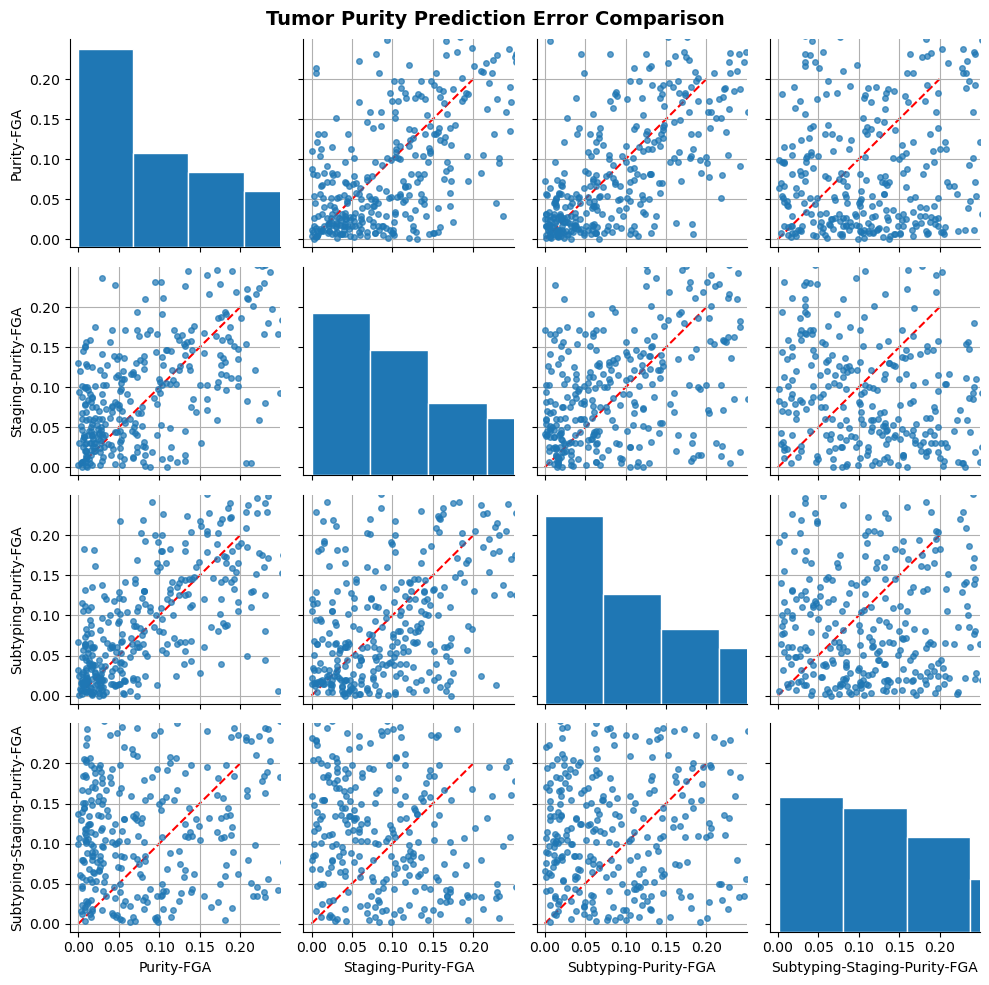

In [237]:
selected_columns = purity_errors.columns[1:]  
grid = sns.PairGrid(purity_errors[selected_columns])

grid.map_diag(plot_hist)
grid.map_offdiag(plot_comparison)

grid.fig.suptitle("Tumor Purity Prediction Error Comparison", fontsize=14, weight='bold')
grid.fig.subplots_adjust(top=0.5)

for i, col in enumerate(selected_columns):
    grid.axes[i][0].set_ylabel(col, fontsize=10)
    grid.axes[-1][i].set_xlabel(col, fontsize=10)

plt.tight_layout()
fig_filename = 'plots/Tumor_purity_0-0.2.png'
grid.savefig(fig_filename, dpi=200)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4312\3293800737.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


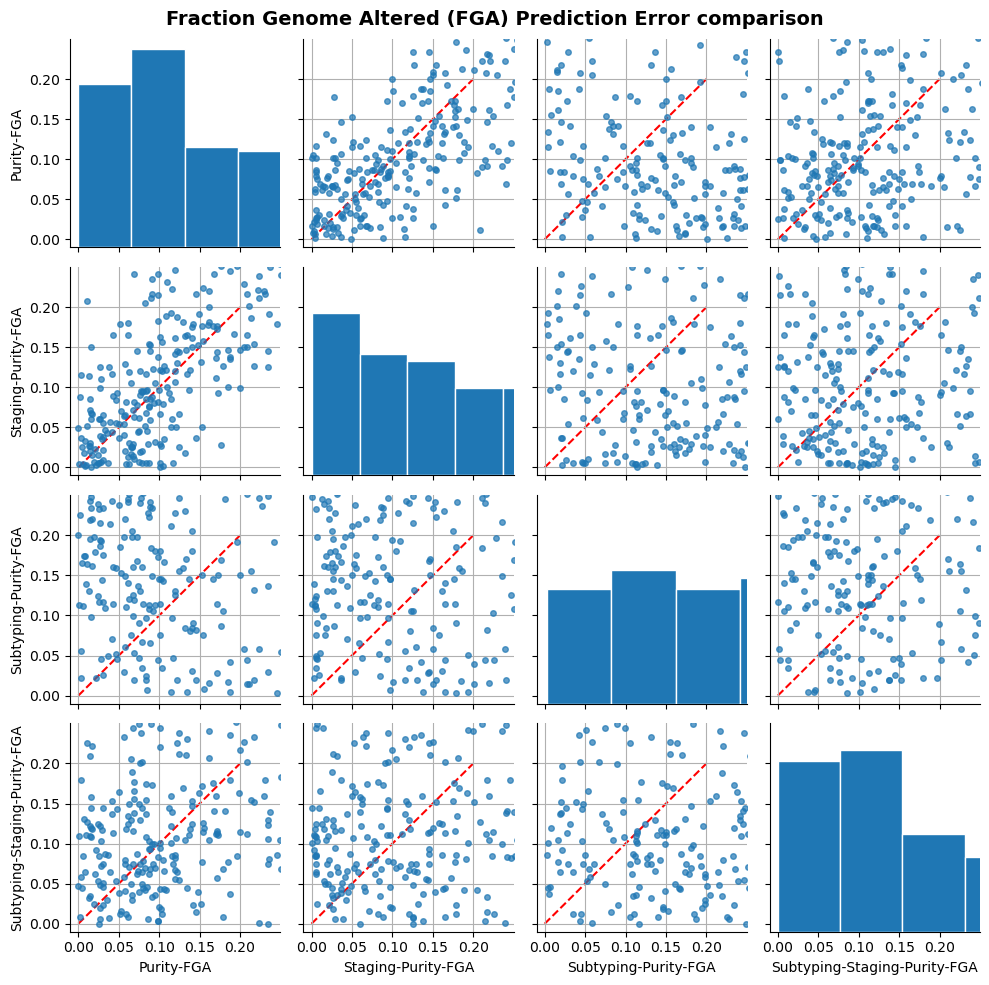

In [238]:
selected_columns = fga_errors.columns[1:]  
grid = sns.PairGrid(fga_errors[selected_columns])

grid.map_diag(plot_hist)
grid.map_offdiag(plot_comparison)

grid.fig.suptitle("Fraction Genome Altered (FGA) Prediction Error comparison", fontsize=14, weight='bold')
grid.fig.subplots_adjust(top=0.95)

for i, col in enumerate(selected_columns):
    grid.axes[i][0].set_ylabel(col, fontsize=10)
    grid.axes[-1][i].set_xlabel(col, fontsize=10)

plt.tight_layout()
fig_filename = 'plots/FGA_0-0.2.png'
grid.savefig(fig_filename, dpi=200)
plt.show()

### Grid with lim 0-0.4

In [17]:
def plot_comparison(x, y, **kwargs):
    ax = plt.gca()
    ax.plot([0, 0.4], [0, 0.4], linestyle='--', color='red', zorder=1)
    ax.scatter(x, y, zorder=2, alpha=0.7, s=16, **kwargs)
    ax.set_xlim((-0.05, 0.45))
    ax.set_xticks(np.arange(0, 0.45, 0.1))
    ax.set_ylim((-0.05, 0.45))
    ax.set_yticks(np.arange(0, 0.45, 0.1))
    ax.grid(True)

def plot_hist(x, **kwargs):
    ax = plt.gca()
    ax.hist(x, edgecolor="w", zorder=0)
    ax.set_xlim((-0.05, 0.45))
    ax.set_xticks(np.arange(0, 0.45, 0.1))
    ax.grid(True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3680\3154747600.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


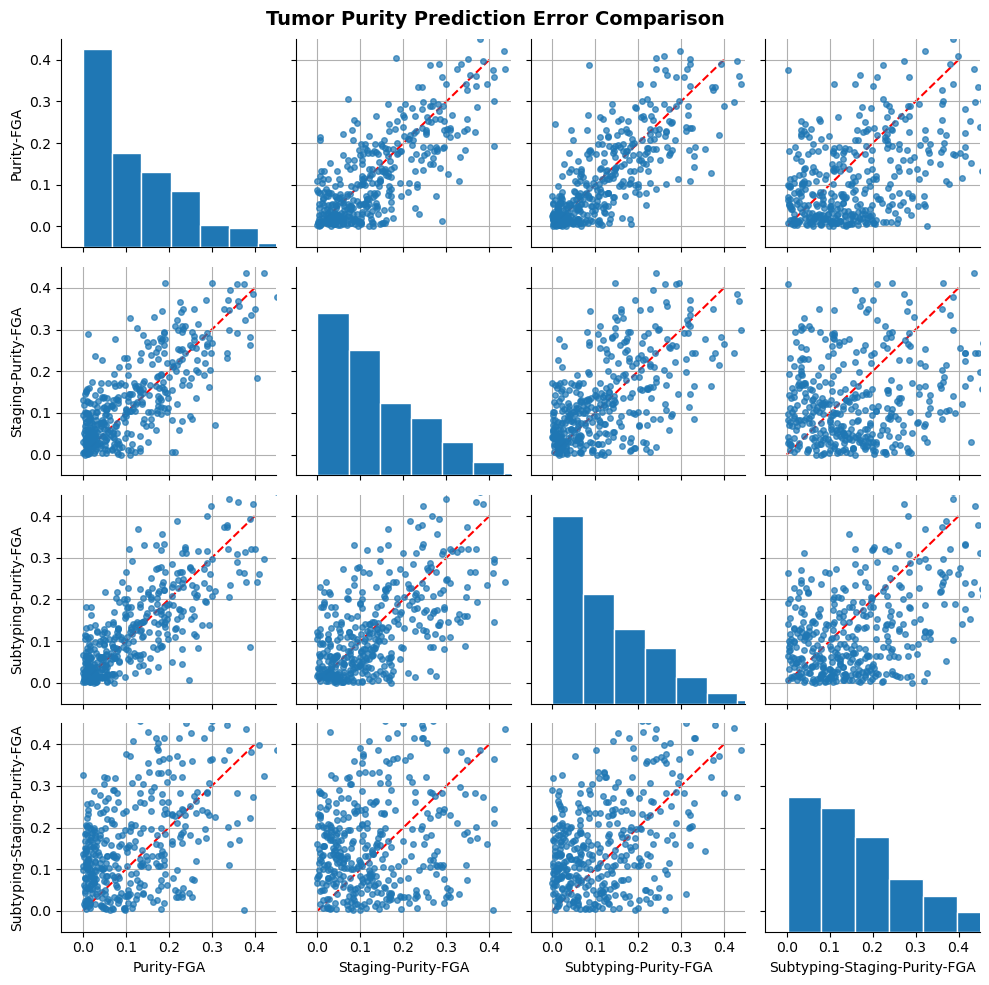

In [18]:
selected_columns = purity_errors.columns[1:]  
grid = sns.PairGrid(purity_errors[selected_columns])

grid.map_diag(plot_hist)
grid.map_offdiag(plot_comparison)

grid.fig.suptitle("Tumor Purity Prediction Error Comparison", fontsize=14, weight='bold')
grid.fig.subplots_adjust(top=0.5)

for i, col in enumerate(selected_columns):
    grid.axes[i][0].set_ylabel(col, fontsize=10)
    grid.axes[-1][i].set_xlabel(col, fontsize=10)

plt.tight_layout()
fig_filename = 'plots/Tumor_purity_0-0.4.png'
grid.savefig(fig_filename, dpi=200)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3680\3141023334.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


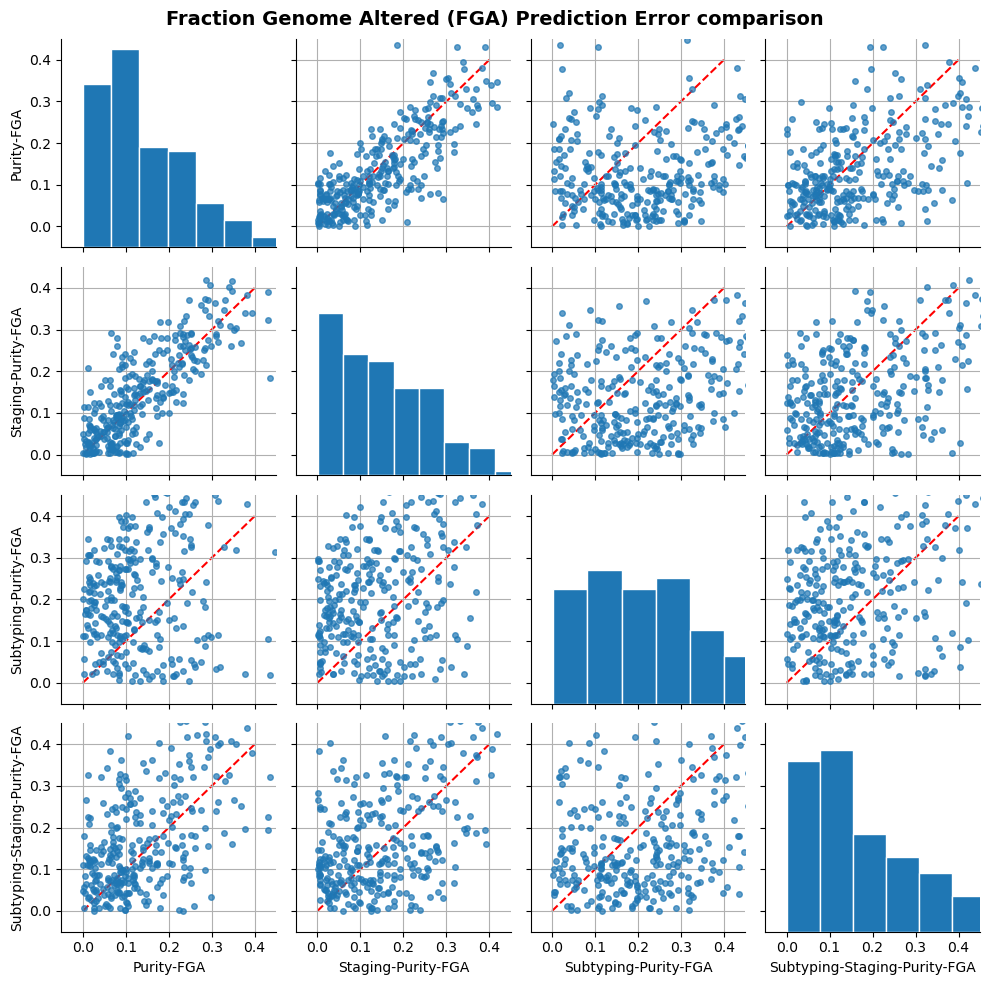

In [19]:
selected_columns = fga_errors.columns[1:]  
grid = sns.PairGrid(fga_errors[selected_columns])

grid.map_diag(plot_hist)
grid.map_offdiag(plot_comparison)

grid.fig.suptitle("Fraction Genome Altered (FGA) Prediction Error comparison", fontsize=14, weight='bold')
grid.fig.subplots_adjust(top=0.95)

for i, col in enumerate(selected_columns):
    grid.axes[i][0].set_ylabel(col, fontsize=10)
    grid.axes[-1][i].set_xlabel(col, fontsize=10)

plt.tight_layout()
fig_filename = 'plots/FGA_0-0.4.png'
grid.savefig(fig_filename, dpi=200)
plt.show()

### Correlation Matrix

In [20]:
purity_corr_matrix = purity_errors[purity_errors.columns[1:]].corr()
purity_corr_matrix.head()

,Purity-FGA,Staging-Purity-FGA,Subtyping-Purity-FGA,Subtyping-Staging-Purity-FGA
Purity-FGA,1.000000,0.802808,0.792870,0.590171
Staging-Purity-FGA,0.802808,1.000000,0.639600,0.381279
Subtyping-Purity-FGA,0.792870,0.639600,1.000000,0.569855
Subtyping-Staging-Purity-FGA,0.590171,0.381279,0.569855,1.000000


In [21]:
fga_corr_matrix = fga_errors[fga_errors.columns[1:]].corr()
fga_corr_matrix.head()

,Purity-FGA,Staging-Purity-FGA,Subtyping-Purity-FGA,Subtyping-Staging-Purity-FGA
Purity-FGA,1.000000,0.841031,0.377960,0.579384
Staging-Purity-FGA,0.841031,1.000000,0.479031,0.539166
Subtyping-Purity-FGA,0.377960,0.479031,1.000000,0.430633
Subtyping-Staging-Purity-FGA,0.579384,0.539166,0.430633,1.000000


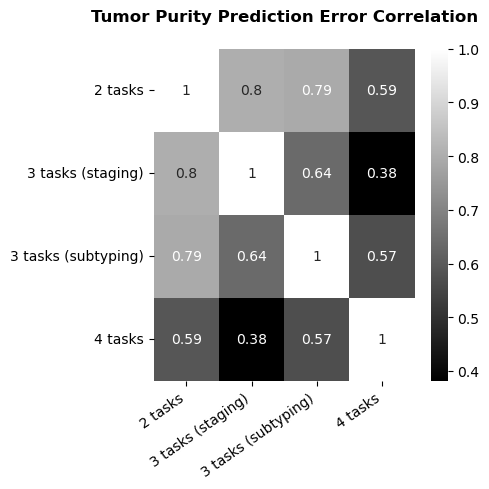

In [22]:
fig, axes = plt.subplots(figsize=(5, 5))
x_labels = ['2 tasks', '3 tasks (staging)', '3 tasks (subtyping)', '4 tasks']
y_labels = ['2 tasks', '3 tasks (staging)', '3 tasks (subtyping)', '4 tasks']
sns.heatmap(purity_corr_matrix, annot=True, xticklabels=x_labels, yticklabels=y_labels, ax=axes, cmap='gray')
plt.xticks(rotation=35, ha="right")
plt.title('Tumor Purity Prediction Error Correlation', pad=20, fontsize=12, weight='bold')
fig_filename = 'plots/Purity_Corr_full.png'
plt.tight_layout()
fig.savefig(fig_filename, dpi=200)
plt.show()


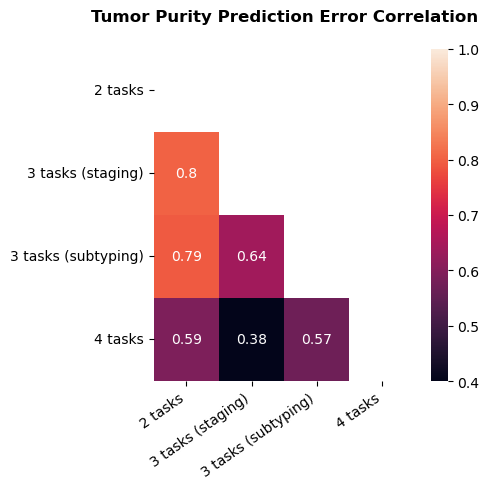

In [319]:
fig, axes = plt.subplots(figsize=(5, 5))
mask = np.triu(np.ones_like(purity_corr_matrix, dtype=bool))
x_labels = ['2 tasks', '3 tasks (staging)', '3 tasks (subtyping)', '4 tasks']
y_labels = ['2 tasks', '3 tasks (staging)', '3 tasks (subtyping)', '4 tasks']
sns.heatmap(purity_corr_matrix, annot=True, mask = mask, xticklabels=x_labels, yticklabels=y_labels, ax=axes, vmin=0.4, vmax=1)
plt.xticks(rotation=35, ha="right")
plt.title('Tumor Purity Prediction Error Correlation', pad=20, fontsize=12, weight='bold')
fig_filename = 'plots/Purity_Corr_half.png'
plt.tight_layout()
fig.savefig(fig_filename, dpi=200)
plt.show()

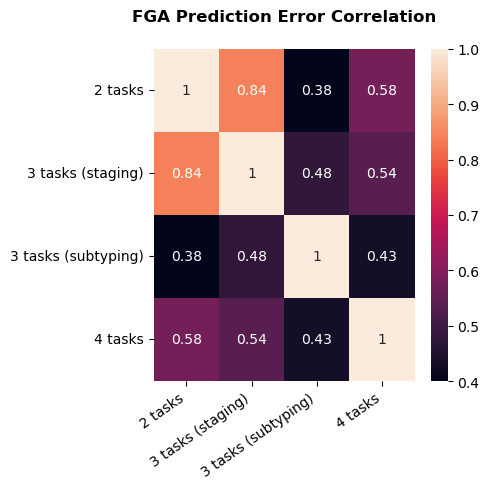

In [320]:
fig, axes = plt.subplots(figsize=(5, 5))
x_labels = ['2 tasks', '3 tasks (staging)', '3 tasks (subtyping)', '4 tasks']
y_labels = ['2 tasks', '3 tasks (staging)', '3 tasks (subtyping)', '4 tasks']
sns.heatmap(fga_corr_matrix, annot=True, xticklabels=x_labels, yticklabels=y_labels, ax=axes, vmin=0.4, vmax=1)
plt.xticks(rotation=35, ha="right")
plt.title('FGA Prediction Error Correlation', pad=20, fontsize=12, weight='bold')
fig_filename = 'plots/FGA_Corr_full.png'
plt.tight_layout()
fig.savefig(fig_filename, dpi=200)
plt.show()


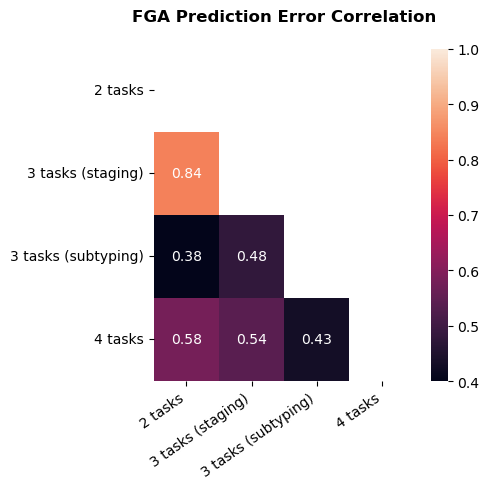

In [321]:
fig, axes = plt.subplots(figsize=(5, 5))
mask = np.triu(np.ones_like(purity_corr_matrix, dtype=bool))
x_labels = ['2 tasks', '3 tasks (staging)', '3 tasks (subtyping)', '4 tasks']
y_labels = ['2 tasks', '3 tasks (staging)', '3 tasks (subtyping)', '4 tasks']
sns.heatmap(fga_corr_matrix, annot=True, mask = mask, xticklabels=x_labels, yticklabels=y_labels, ax=axes,  vmin=0.4, vmax=1)
plt.xticks(rotation=35, ha="right")
plt.title('FGA Prediction Error Correlation', pad=20, fontsize=12, weight='bold')
fig_filename = 'plots/FGA_Corr_half.png'
plt.tight_layout()
fig.savefig(fig_filename, dpi=200)
plt.show()